<a href="https://colab.research.google.com/github/takedatmh/toyama/blob/main/3_NNs_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#3.1 Neural Network Samples

###PyTorch サンプルプログラム: ニューラルネットワーク各種アーキテクチャ
============================================================

### ※ 注意: PyTorch がインストールされていない環境ではこのコードは動作しません。
### Google Colab やローカル環境（pip install torch）で実行してください。

In [1]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 35.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

"""
# アルゴリズム概要

## GRU（Gated Recurrent Unit）
- **概要**: LSTMよりも簡素なゲート構造を持つRNNの一種。
- **特徴**: 計算効率が高く、LSTMに近い性能を持つ。
- **長所**: 少ないパラメータで高速。
- **短所**: LSTMより柔軟性に欠ける場合もある。
- **代表論文**: Cho et al., 2014
  - https://arxiv.org/abs/1406.1078
- **用途例**: 時系列処理、音声認識。

## Seq2Seq with Attention
- **概要**: Attention機構を導入したSeq2Seqモデル。
- **特徴**: エンコーダの出力全体を参照可能。
- **長所**: 長文にも強く、精度が向上。
- **短所**: 計算コストが増える。
- **代表論文**: Bahdanau et al., 2014
  - https://arxiv.org/abs/1409.0473
- **用途例**: 機械翻訳、要約。

## Vision Transformer（ViT）
- **概要**: 画像をパッチに分割してTransformerで処理。
- **特徴**: CNNを使わずに自己注意で画像処理。
- **長所**: 大規模データセットで優れた精度。
- **短所**: 小データではCNNより劣る。
- **代表論文**: Dosovitskiy et al., 2020
  - https://arxiv.org/abs/2010.11929
- **用途例**: 画像分類、セグメンテーション。

## BERT（Bidirectional Encoder Representations from Transformers）
- **概要**: 双方向Transformerエンコーダ。
- **特徴**: 文脈を双方向で捉える。
- **長所**: 精度が非常に高く、多用途に利用可能。
- **短所**: トレーニングが重い。
- **代表論文**: Devlin et al., 2018
  - https://arxiv.org/abs/1810.04805
- **用途例**: QA、感情分析、NER、文分類。

## DNN（多層パーセプトロン）
- **概要**: 全結合層を積み重ねた基本的なネットワーク。
- **特徴**: 入力特徴量と出力が密結合。
- **長所**: 実装が簡単。
- **短所**: 空間的・時間的パターンの表現が苦手。
- **代表論文**: Rosenblatt, 1958
  - https://en.wikipedia.org/wiki/Perceptron
- **用途例**: 構造化データ、初期のML応用。

## CNN（畳み込みニューラルネット）
- **概要**: 空間的特徴を抽出するためのフィルターを使う。
- **特徴**: 局所受容野、パラメータ共有。
- **長所**: 画像、ビデオ、時系列などで強力。
- **短所**: 長期依存性は苦手。
- **代表論文**: LeCun et al., 1998 (LeNet-5)
  - http://yann.lecun.com/exdb/lenet/
- **用途例**: 画像分類、物体検出、セグメンテーション。

## RNN（単純リカレントネット）
- **概要**: 入力系列に依存した出力を順番に生成。
- **特徴**: 時間的な隠れ状態を維持。
- **長所**: 短期の系列処理に有効。
- **短所**: 勾配消失により長期依存が苦手。
- **代表論文**: Elman, 1990
  - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7098343/
- **用途例**: 時系列予測、テキスト生成。

## LSTM
- **概要**: RNNの改良型で長期依存性を学習可能。
- **特徴**: ゲート機構（入力・出力・忘却）を持つ。
- **長所**: 長期依存の記憶が可能。
- **短所**: モデルサイズと計算コストが高め。
- **代表論文**: Hochreiter & Schmidhuber, 1997
  - https://www.bioinf.jku.at/publications/older/2604.pdf
- **用途例**: 翻訳、要約、対話応答。

## Transformer
- **概要**: 自己注意機構を使い並列計算が可能。
- **特徴**: 全体の文脈を一度に見て処理。
- **長所**: 長期依存・高速トレーニング。
- **短所**: 計算リソースを多く消費。
- **代表論文**: Vaswani et al., 2017
  - https://arxiv.org/abs/1706.03762
- **用途例**: 翻訳、コード生成、文生成、ChatGPT系モデル。
"""

エポック 1, 平均ロス: 0.1411
正解率: 98.35%
エポック 2, 平均ロス: 0.0429
正解率: 98.64%
エポック 3, 平均ロス: 0.0270
正解率: 98.83%
エポック 4, 平均ロス: 0.0174
正解率: 98.81%
エポック 5, 平均ロス: 0.0136
正解率: 99.13%
正解率: 99.13%


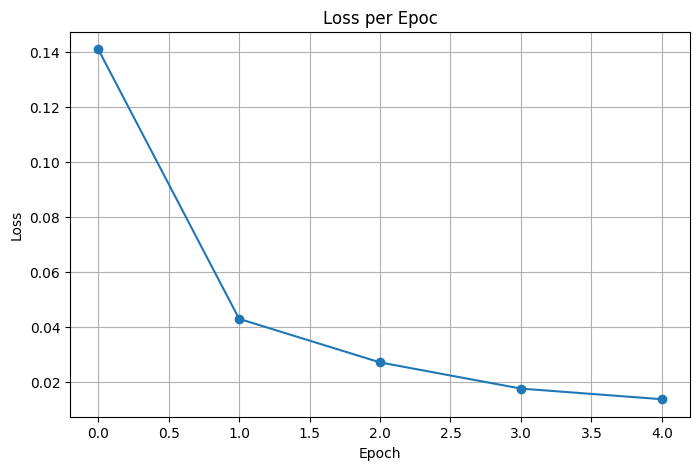

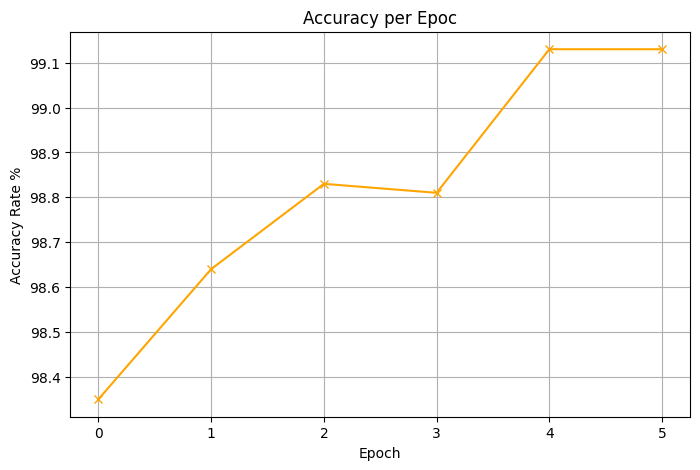

In [2]:
# PyTorch サンプルプログラム: ニューラルネットワーク各種アーキテクチャ
# ============================================================

# ※ 注意: PyTorch がインストールされていない環境ではこのコードは動作しません。
# Google Colab やローカル環境で実行してください。

try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    import torch.nn.functional as F
    from torch.utils.data import DataLoader
    from torchvision import datasets, transforms
    import os
    import numpy as np
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
except ModuleNotFoundError as e:
    raise ModuleNotFoundError(
        "必要なライブラリが見つかりません。Google Colab または PyTorch 環境で再実行してください。"
    ) from e

# 実行環境の選択：GPUが利用可能であればGPUを、それ以外はCPUを使用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# CPUで明示的に実行したい場合は下記をコメントイン
# device = torch.device("cpu")

# ========================
# データの準備
# 今回使用するデータセットは MNIST（手書き数字画像）です。
# - 画像サイズは 28x28 のグレースケール
# - クラス数は 0〜9 の10種類
# - 学習データ60,000件 / テストデータ10,000件
# ========================
data_transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
# データの正規化とテンソル変換を含む前処理
train_dataset = datasets.MNIST(root='./data', train=True, transform=data_transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=data_transform, download=True)
# トレーニング用データセット
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# テスト用データセット
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# ========================
# 訓練・評価処理
# DataLoader によるバッチ処理とシャッフル
# バッチサイズは64（1ステップで64枚の画像を一度に処理）
# ========================
train_losses = []
test_accuracies = []

# 訓練関数
def train_model(model, optimizer, criterion, epochs=3):
    model.to(device)
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0 # エポックごとの合計損失
        for batch in train_loader:
            data, targets = batch
            data, targets = data.to(device), targets.to(device)
            # RNN/LSTM用に形状を変換（[batch, 1, 28, 28] → [batch, 28, 28]）
            if isinstance(model, (RNN, LSTM, Seq2SeqAttention)):
                data = data.squeeze(1)
            optimizer.zero_grad() # 勾配初期化
            outputs = model(data) # 順伝播
            loss = criterion(outputs, targets) # 損失計算
            loss.backward() # 誤差逆伝播
            optimizer.step()  # 重み更新
            running_loss += loss.item()
        avg_loss = running_loss / len(train_loader)
        train_losses.append(avg_loss)
        print(f"エポック {epoch+1}, 平均ロス: {avg_loss:.4f}")
        # エポックごとにテストを実施し精度を記録
        test_model(model)

# ========================
# 評価関数（テスト）
# ========================
def test_model(model):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_targets = []
    with torch.no_grad():
        for data, targets in test_loader:
            data, targets = data.to(device), targets.to(device)
            if isinstance(model, (RNN, LSTM, Seq2SeqAttention)):
                data = data.squeeze(1)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1) # 最大スコアのクラスを予測
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    acc = 100 * correct / total
    test_accuracies.append(acc)
    print(f"正解率: {acc:.2f}%")

# ========================
# モデル定義
# ========================
class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()
        self.rnn = nn.RNN(input_size=28, hidden_size=64, batch_first=True)
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        output, _ = self.rnn(x)
        return self.fc(output[:, -1, :])

class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size=28, hidden_size=64, batch_first=True)
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        output, _ = self.lstm(x)
        return self.fc(output[:, -1, :])

class Seq2SeqAttention(nn.Module):
    def __init__(self):
        super(Seq2SeqAttention, self).__init__()
        self.encoder = nn.LSTM(28, 64, batch_first=True, bidirectional=True)
        self.decoder = nn.LSTM(128, 64, batch_first=True)
        self.attn = nn.Linear(64 + 128, 1)
        self.fc = nn.Linear(128, 10) # Changed the input features from 64 to 128 to match the context vector size

    def forward(self, x):
        x = x.squeeze(1)
        encoder_outputs, (hidden, cell) = self.encoder(x)
        decoder_input = encoder_outputs.mean(1).unsqueeze(1).repeat(1, x.size(1), 1)
        decoder_output, _ = self.decoder(decoder_input)
        attn_weights = torch.softmax(self.attn(torch.cat((decoder_output, encoder_outputs), dim=2)), dim=1)
        context = torch.sum(attn_weights * encoder_outputs, dim=1)
        return self.fc(context) # context's shape is (batch_size, 128), now compatible with self.fc

# ========================
# モデルの選択と実行
# ========================
# 使用するモデルを選んでコメントアウトを外す
# model = DNN()
model = CNN()
# model = RNN()
# model = LSTM()
# model = Seq2SeqAttention()

optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# 学習 & 評価（保存なし）
train_model(model, optimizer, criterion, epochs=5)
test_model(model)

# グラフや可視化は matplotlib 非対応の環境では無効化
try:
    import matplotlib.pyplot as plt
    def plot_training_loss():
        plt.figure(figsize=(8, 5))
        plt.plot(train_losses, marker='o')
        plt.title("Loss per Epoc")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()

    def plot_test_accuracy():
        plt.figure(figsize=(8, 5))
        plt.plot(test_accuracies, marker='x', color='orange')
        plt.title("Accuracy per Epoc")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy Rate %")
        plt.grid(True)
        plt.show()

    plot_training_loss()
    plot_test_accuracy()
except ImportError:
    print("matplotlibが見つかりませんでした。グラフ描画はスキップされます。")


# Neural Network構成の可視化

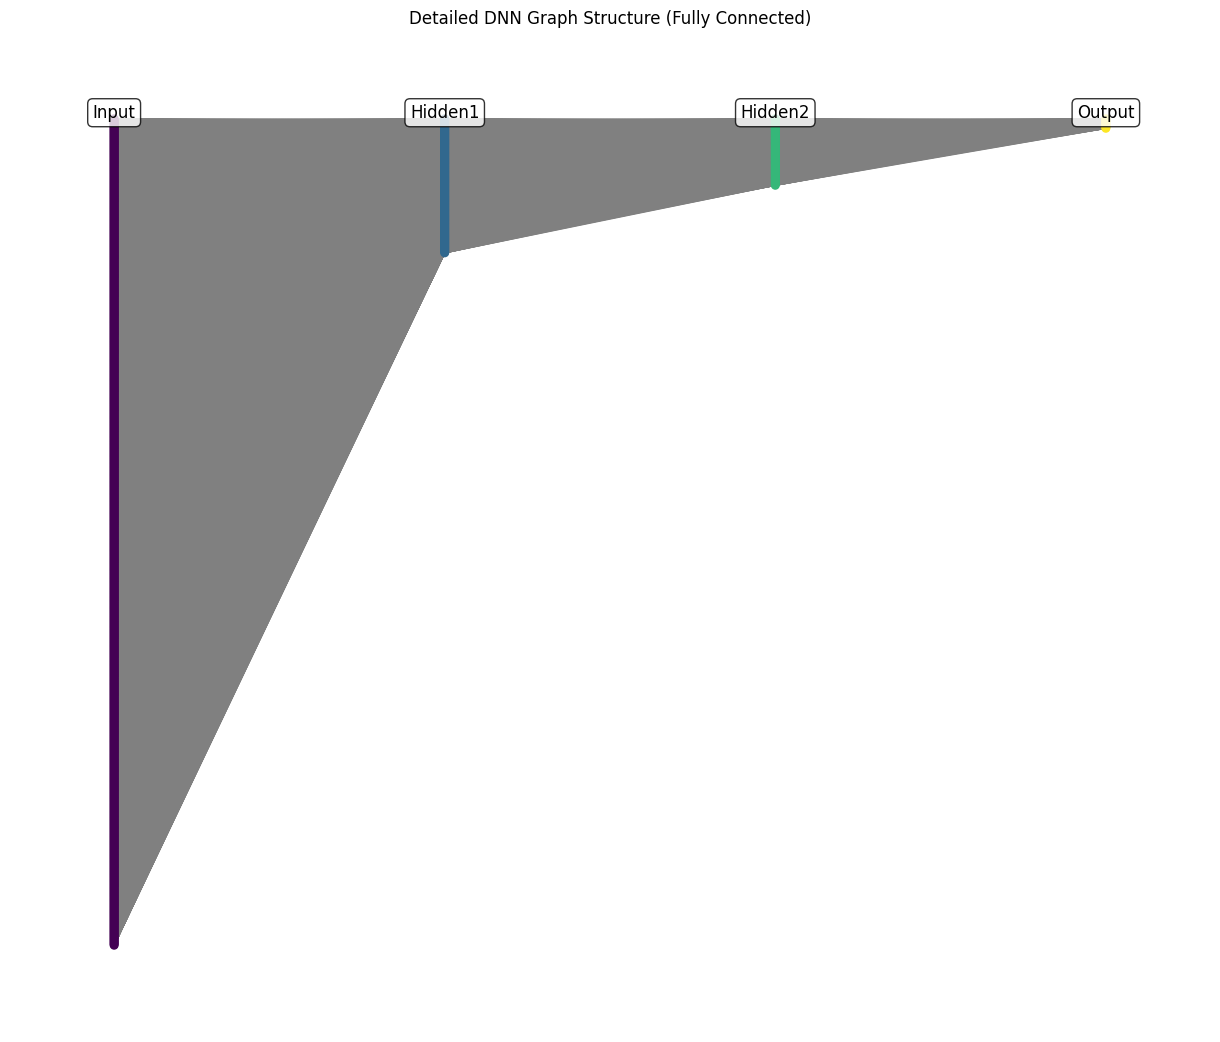

In [5]:
# Re-import necessary packages after code execution environment was reset
import networkx as nx
import matplotlib.pyplot as plt

# DNNの構造をノード・エッジで詳細に描画する関数
def draw_detailed_dnn(input_size=28*28, hidden1=128, hidden2=64, output=10):
    G = nx.DiGraph()

    layers = {
        'Input': input_size,
        'Hidden1': hidden1,
        'Hidden2': hidden2,
        'Output': output
    }

    pos = {}
    node_id = 0
    layer_positions = {}
    y_gap = 1
    x_gap = 4
    colors = []

    # ノード配置と記録
    for i, (layer_name, num_nodes) in enumerate(layers.items()):
        layer_node_ids = []
        for j in range(num_nodes):
            nid = f"{layer_name}_{j}"
            G.add_node(nid, layer=layer_name)
            pos[nid] = (i * x_gap, -j * y_gap)
            colors.append(i)
            layer_node_ids.append(nid)
        layer_positions[layer_name] = layer_node_ids

    # エッジ追加（全結合）
    layer_keys = list(layers.keys())
    for i in range(len(layer_keys) - 1):
        src_layer = layer_positions[layer_keys[i]]
        dst_layer = layer_positions[layer_keys[i + 1]]
        for src in src_layer:
            for dst in dst_layer:
                G.add_edge(src, dst)

    # 描画
    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=False, node_size=30, arrows=False,
            node_color=colors, cmap=plt.cm.viridis, edge_color='gray')

    # 各レイヤー名のラベル追加
    for layer_name, nodes in layer_positions.items():
        x_pos = pos[nodes[0]][0]
        y_pos = max([pos[n][1] for n in nodes]) + 1
        plt.text(x_pos, y_pos, layer_name, fontsize=12, ha='center', bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

    plt.title("Detailed DNN Graph Structure (Fully Connected)")
    plt.axis('off')
    plt.show()

# 実行
draw_detailed_dnn()


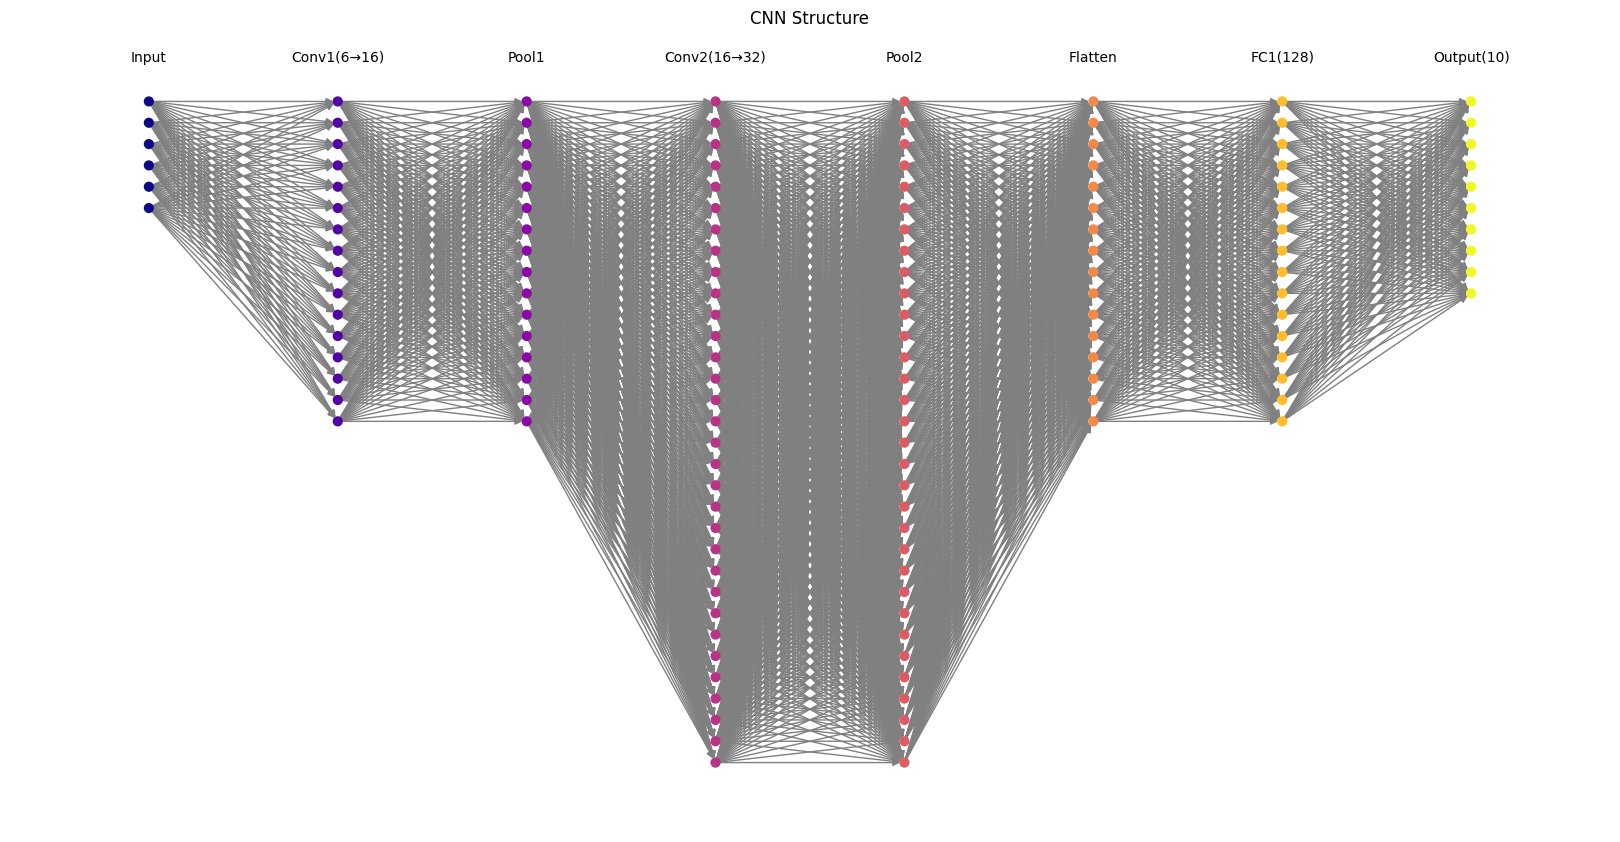

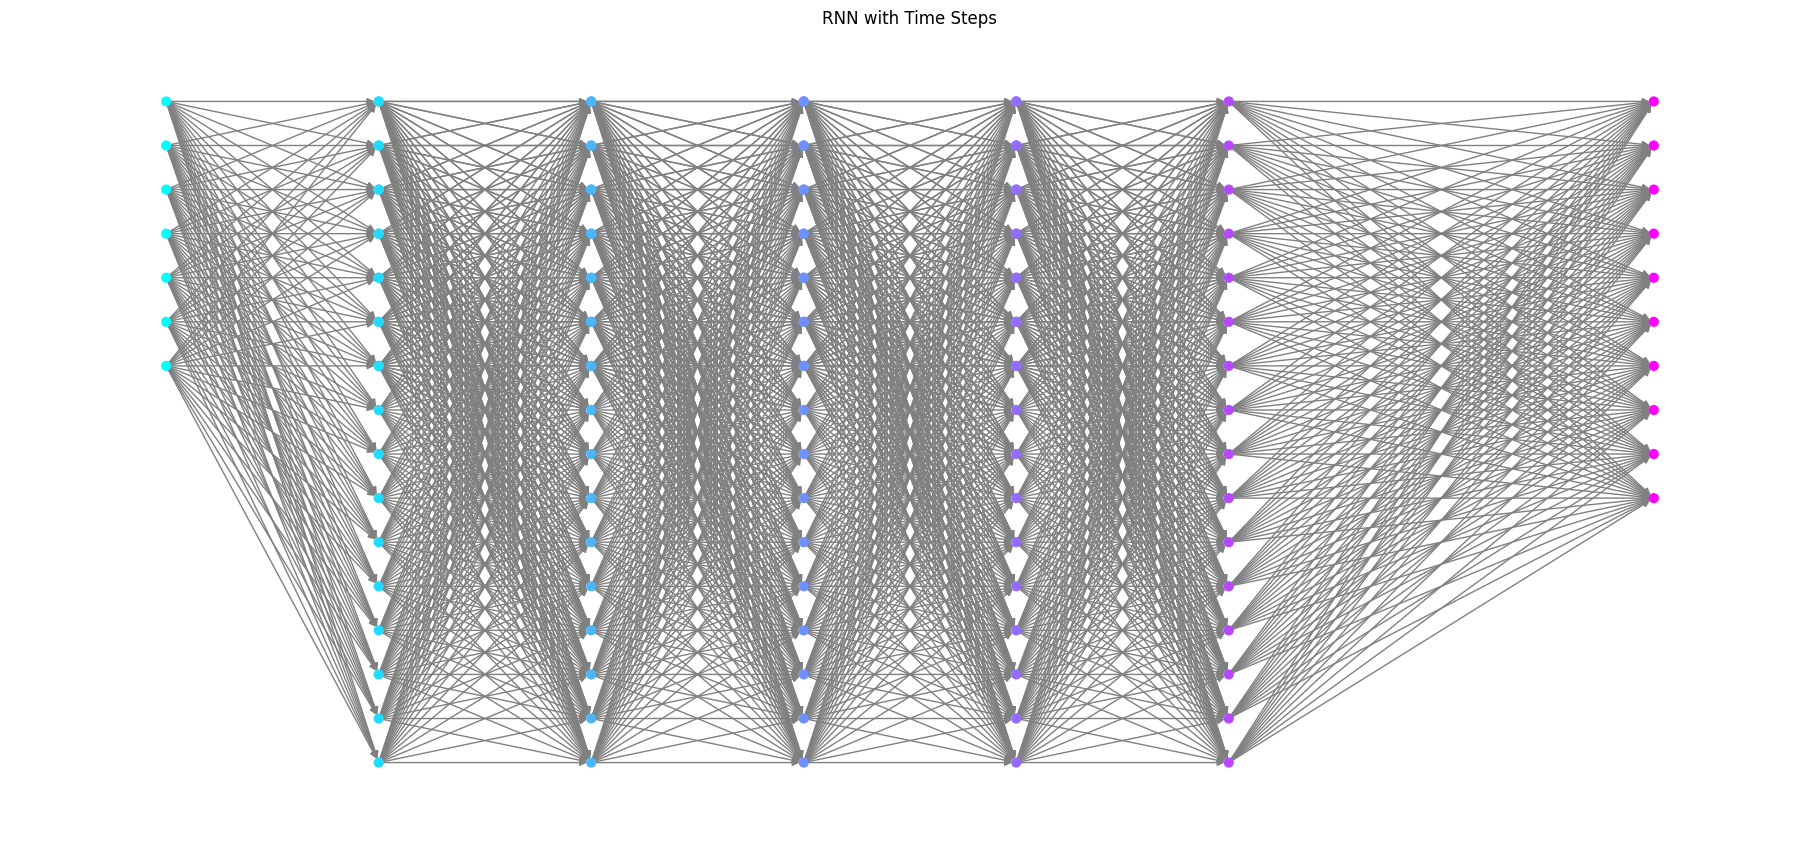

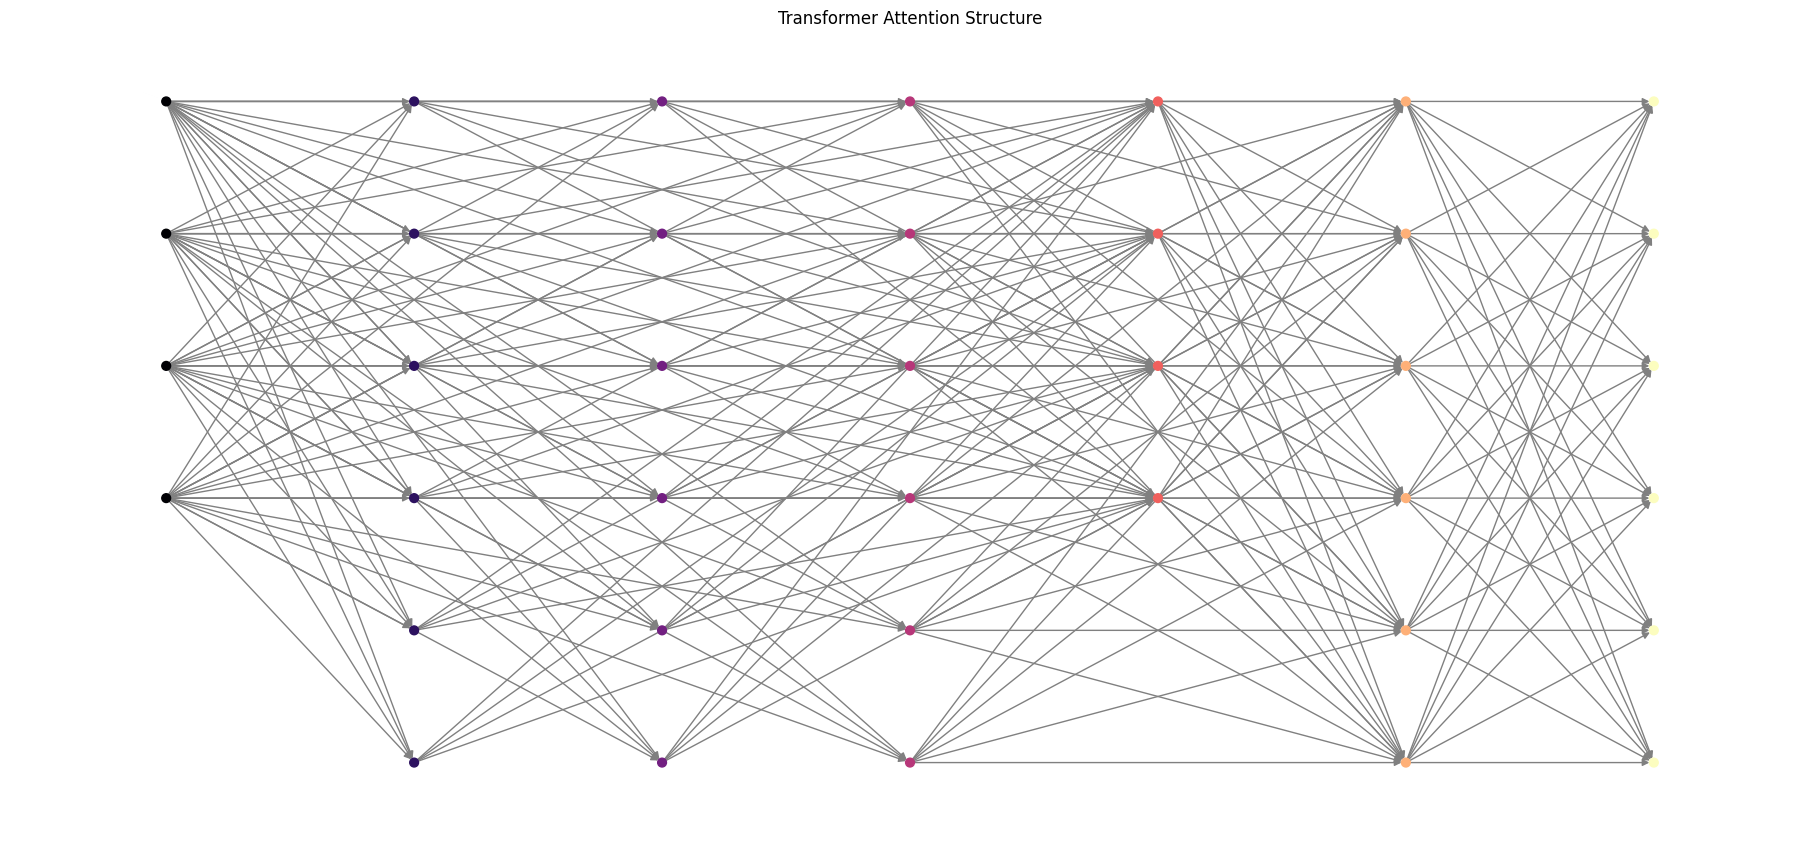

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# ユーティリティ関数：レイヤーごとのノードを追加して全結合で結ぶ
def add_layer(G, pos, colors, layer_name, num_nodes, layer_idx, x_gap=3, y_gap=0.8):
    node_ids = []
    for i in range(num_nodes):
        node_id = f"{layer_name}_{i}"
        G.add_node(node_id, layer=layer_name)
        pos[node_id] = (layer_idx * x_gap, -i * y_gap)
        colors.append(layer_idx)
        node_ids.append(node_id)
    return node_ids

# CNN構造のグラフ描画（簡易化した畳み込み＋全結合）
def draw_cnn_structure():
    G = nx.DiGraph()
    pos = {}
    colors = []

    # 畳み込み→プーリング→全結合の代表的な構造
    input_nodes = add_layer(G, pos, colors, "Input", 6, 0)
    conv1_nodes = add_layer(G, pos, colors, "Conv1(6→16)", 16, 1)
    pool1_nodes = add_layer(G, pos, colors, "Pool1", 16, 2)
    conv2_nodes = add_layer(G, pos, colors, "Conv2(16→32)", 32, 3)
    pool2_nodes = add_layer(G, pos, colors, "Pool2", 32, 4)
    flatten_nodes = add_layer(G, pos, colors, "Flatten", 16, 5)
    fc1_nodes = add_layer(G, pos, colors, "FC1(128)", 16, 6)
    output_nodes = add_layer(G, pos, colors, "Output(10)", 10, 7)

    # 全結合エッジ
    for src_layer, dst_layer in zip([input_nodes, conv1_nodes, pool1_nodes, conv2_nodes, pool2_nodes, flatten_nodes, fc1_nodes],
                                    [conv1_nodes, pool1_nodes, conv2_nodes, pool2_nodes, flatten_nodes, fc1_nodes, output_nodes]):
        for src in src_layer:
            for dst in dst_layer:
                G.add_edge(src, dst)

    plt.figure(figsize=(16, 8))
    nx.draw(G, pos, with_labels=False, node_size=40, node_color=colors, cmap=plt.cm.plasma, edge_color="gray")
    for node in pos:
        if node.endswith("_0"):
            x, y = pos[node]
            plt.text(x, y + 1.5, node.split('_')[0], fontsize=10, ha='center')
    plt.title("CNN Structure")
    plt.axis("off")
    plt.show()

# 時系列ステップを含めたRNN構造の描画
def draw_rnn_structure(seq_len=5, input_dim=28, hidden_dim=64):
    G = nx.DiGraph()
    pos = {}
    colors = []

    input_nodes = []
    rnn_nodes = []
    for t in range(seq_len):
        input_nodes += add_layer(G, pos, colors, f"Input_t{t}", input_dim // 4, t)
        rnn_nodes += add_layer(G, pos, colors, f"Hidden_t{t}", hidden_dim // 4, t + 1)

    output_nodes = add_layer(G, pos, colors, "Output", 10, seq_len + 2)

    # 時系列の各タイムステップで接続
    for t in range(seq_len):
        for i in input_nodes[t * (input_dim // 4):(t + 1) * (input_dim // 4)]:
            for h in rnn_nodes[t * (hidden_dim // 4):(t + 1) * (hidden_dim // 4)]:
                G.add_edge(i, h)
        # 時系列依存性（隠れ状態の遷移）
        if t > 0:
            for h_prev in rnn_nodes[(t - 1) * (hidden_dim // 4):t * (hidden_dim // 4)]:
                for h_curr in rnn_nodes[t * (hidden_dim // 4):(t + 1) * (hidden_dim // 4)]:
                    G.add_edge(h_prev, h_curr)

    # 最終ステップの隠れ状態 → 出力
    for h in rnn_nodes[-(hidden_dim // 4):]:
        for o in output_nodes:
            G.add_edge(h, o)

    plt.figure(figsize=(18, 8))
    nx.draw(G, pos, with_labels=False, node_size=40, node_color=colors, cmap=plt.cm.cool, edge_color="gray")
    plt.title("RNN with Time Steps")
    plt.axis("off")
    plt.show()

# Attention構造の可視化（簡易）
def draw_attention_structure(seq_len=4, embed_dim=6):
    G = nx.DiGraph()
    pos = {}
    colors = []

    input_nodes = add_layer(G, pos, colors, "InputTokens", seq_len, 0)
    query_nodes = add_layer(G, pos, colors, "Query", embed_dim, 1)
    key_nodes = add_layer(G, pos, colors, "Key", embed_dim, 2)
    value_nodes = add_layer(G, pos, colors, "Value", embed_dim, 3)
    score_nodes = add_layer(G, pos, colors, "AttentionScores", seq_len, 4)
    context_nodes = add_layer(G, pos, colors, "Context", embed_dim, 5)
    output_nodes = add_layer(G, pos, colors, "Output", embed_dim, 6)

    for i in input_nodes:
        for q in query_nodes: G.add_edge(i, q)
        for k in key_nodes: G.add_edge(i, k)
        for v in value_nodes: G.add_edge(i, v)

    for q in query_nodes:
        for k in key_nodes:
            for s in score_nodes:
                G.add_edge(q, s)
                G.add_edge(k, s)

    for s in score_nodes:
        for v in value_nodes:
            for c in context_nodes:
                G.add_edge(s, c)
                G.add_edge(v, c)

    for c in context_nodes:
        for o in output_nodes:
            G.add_edge(c, o)

    plt.figure(figsize=(18, 8))
    nx.draw(G, pos, with_labels=False, node_size=40, node_color=colors, cmap=plt.cm.magma, edge_color="gray")
    plt.title("Transformer Attention Structure")
    plt.axis("off")
    plt.show()

# 実行
draw_cnn_structure()
draw_rnn_structure()
draw_attention_structure()
